In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from google.colab import drive 
import tensorflow as tf
drive.mount(('/content/drive'))
#drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/SalesData.csv')
df.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [ ]:
df.describe

<bound method NDFrame.describe of      Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

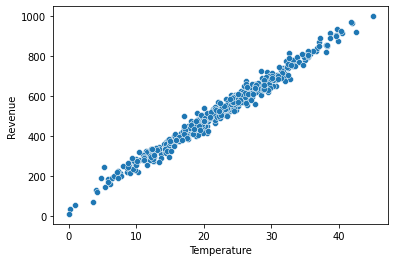

In [ ]:
sns.scatterplot(df['Temperature'], df['Revenue'])

In [ ]:
X_train = df[['Temperature']]
y_train = df[['Revenue']]
model = LinearRegression() # model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train)
print("Intercept(c): ", model.intercept_)
print("Coefficient(m): ", model.coef_)

Intercept(c):  [44.83126709]
Coefficient(m):  [[21.44362551]]


In [ ]:
print(X_train.shape)
print(y_train.shape)


(500, 1)
(500, 1)


In [ ]:
mod = tf.keras.Sequential()
mod.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))

In [ ]:
mod.compile(optimizer = tf.keras.optimizers.Adam(1), loss = 'mean_squared_error')

In [ ]:
epochs_hist = mod.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 1s 3ms/step - loss: 157115.2500
Epoch 2/1000
16/16 [==============================] - 0s 4ms/step - loss: 9826.0986
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 3336.3508
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 1292.6067
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 776.7963
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 691.5193
Epoch 7/1000
16/16 [==============================] - 0s 4ms/step - loss: 681.4213
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 676.7373
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 676.5431
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 676.3540
Epoch 11/1000
16/16 [==============================] - 0s 2ms/step - loss: 672.7371
Epoch 12/1000
16/16 [==============================] - 0s 2ms/step - loss: 670.

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

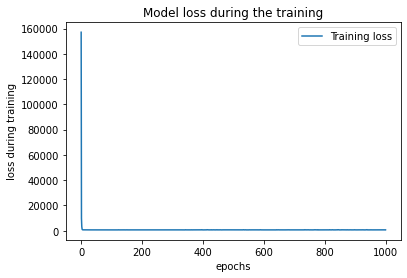

In [ ]:
eh = epochs_hist.history['loss']
plt.plot(eh)
plt.title('Model loss during the training')
plt.xlabel('epochs')
plt.ylabel('loss during training')
plt.legend(['Training loss'])

In [ ]:
mod.get_weights()
temperature = 45
Revenue = mod.predict([temperature])
print("The Revenue predicted by the model is: ", Revenue)

1/1 [==============================] - 0s 118ms/step
The Revenue predicted by the model is:  [[1022.02966 1022.0296  1022.02966 1022.02966 1022.02954 1022.02966
  1022.02954 1022.0297  1022.0296  1022.02966]]


16/16 [==============================] - 0s 2ms/step


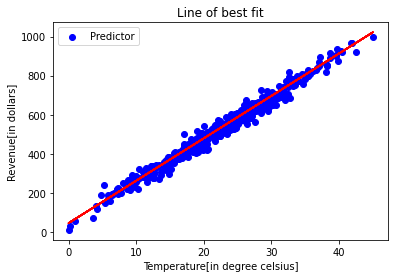

In [ ]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, mod.predict(X_train), color = 'red')
plt.title('Line of best fit')
plt.xlabel('Temperature[in degree celsius]')
plt.ylabel('Revenue[in dollars]')
plt.legend(['Predictor'])

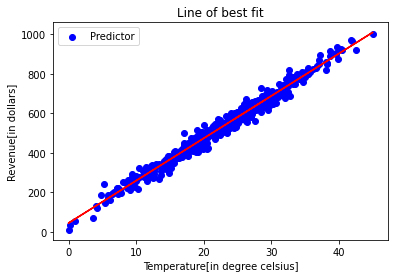

In [ ]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.title('Line of best fit')
plt.xlabel('Temperature[in degree celsius]')
plt.ylabel('Revenue[in dollars]')
plt.legend(['Predictor'])